In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

In [2]:
vox = 2
voy = 3
yo = 10
xo = 0
global g
g = 9.8

In [3]:
y_ = lambda t,yo,voy: yo + (voy*t) - ((0.5) * g *(t**2))
x_ = lambda t,vox: xo + vox*t

In [4]:
root = newton(y_,2, args=[yo,voy])
t = np.linspace(0,root,10)
x = x_(t,vox)
y = y_(t,yo,voy)

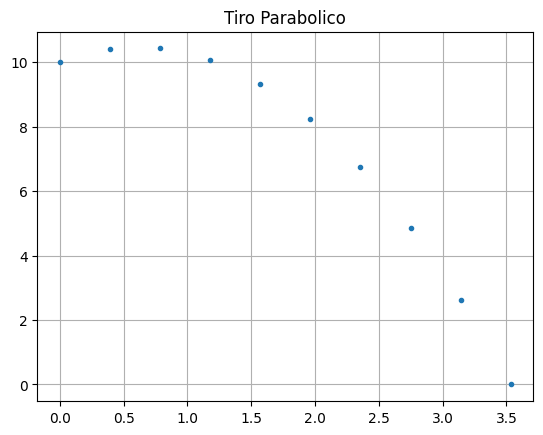

In [5]:
plt.plot(x,y, ".")
plt.title("Tiro Parabolico")
plt.grid()
plt.show()

In [6]:
def pendiente(y,t):
  m = (y[1::] - y[:-1]) / (t[1:] - t[:-1])
  tmean = (t[1::] + t[:-1]) * 0.5 # Tiempo promedio
  return m, tmean

In [7]:
vy,tmean = pendiente(y,t)
vx = vox*np.ones(len(tmean))

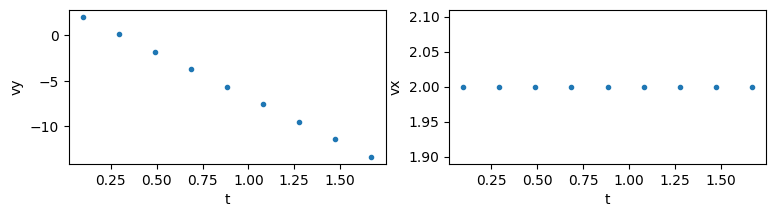

In [8]:
fig, axs = plt.subplots(ncols=2,nrows=1, figsize=(9,2))
ax = axs.flatten()
ax[0].plot(tmean,vy,".")
ax[0].set_xlabel("t")
ax[0].set_ylabel("vy")
ax[1].plot(tmean,vx,".")
ax[1].set_xlabel("t")
ax[1].set_ylabel("vx")
plt.show()

In [9]:
x = x[:-1]
y = y[:-1]
vx = vx
vy = vy

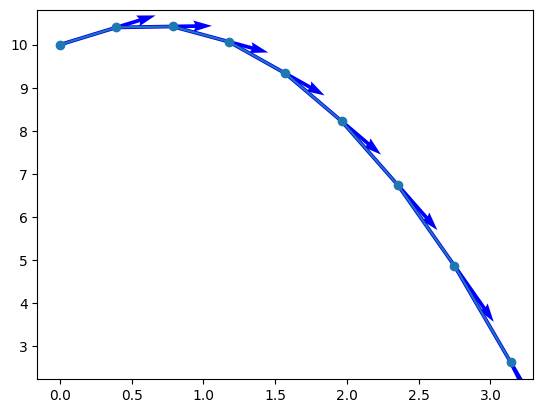

In [10]:
fig, ax = plt.subplots()
ax.plot(x,y,"o-")
ax.quiver(x, y, vx, vy, angles='xy', scale_units='xy', scale=3, color='blue')

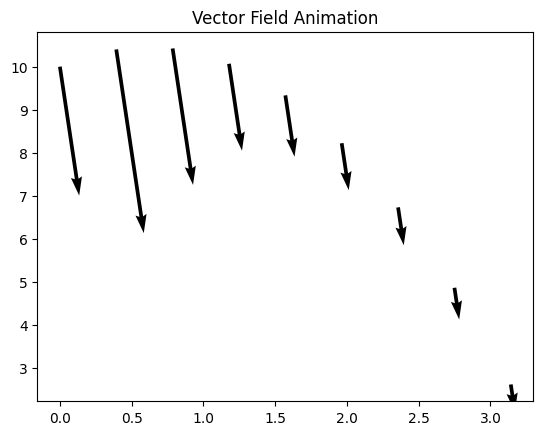

In [11]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Crear la figura y los ejes
fig, ax = plt.subplots()
# Inicializar los quiver
quivers = [ax.quiver(x[i], y[i], vx[i], vy[i]) for i in range(len(x))]
# Función de inicialización
def init():
    for quiver in quivers:
        quiver.set_UVC(0, 0)
    return quivers
# Función de actualización
def update(frame):
    for i, quiver in enumerate(quivers):
        quiver.set_UVC(vx[frame], vy[frame])
    return quivers

ax.set_title('Vector Field Animation')
# Crear la animación
ani = FuncAnimation(fig, update, frames=len(x), init_func=init, blit=True)
# Guardar la animación como un archivo HTML
ani_html = HTML(ani.to_html5_video())
# Mostrar la animación
ani_html
